In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

In [3]:
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


### Выясним взаимосвязь бедности (poverty - ЗП) и среднего образования (hs_grad - НЗП)

In [21]:
b0 = st.linregress(x=df.hs_grad, y=df.poverty).intercept
b1 = st.linregress(x=df.hs_grad, y=df.poverty).slope
y = b0 + b1*df.hs_grad

Text(90, 17, 'R=-0.75')

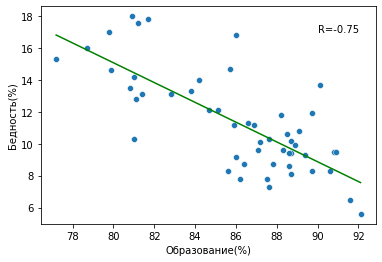

In [39]:
sns.scatterplot(x=df.hs_grad, y=df.poverty)
sns.lineplot(x=X, y=y, color='green')
plt.xlabel('Образование(%)')
plt.ylabel('Бедность(%)')
r = f'R={st.linregress(x=df.hs_grad, y=df.poverty).rvalue.round(2)}'
plt.text(90,17, r)

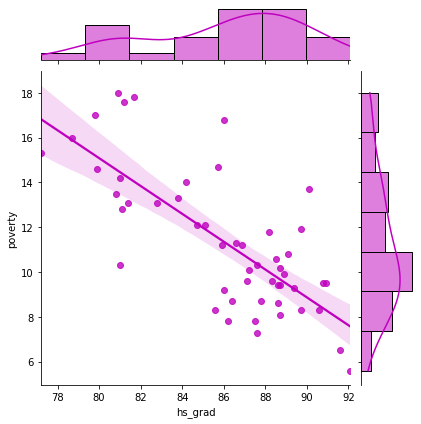

In [25]:
sns.jointplot(x=df.hs_grad, y=df.poverty, kind='reg', color='m')

In [8]:
df[['hs_grad', 'poverty']].describe()

,hs_grad,poverty
count,51.000000,51.000000
mean,86.011765,11.349020
std,3.725998,3.099185
min,77.200000,5.600000
25%,83.300000,9.250000
50%,86.900000,10.600000
75%,88.700000,13.400000
max,92.100000,18.000000


In [41]:
st.linregress(x=df.hs_grad, y=df.poverty)

LinregressResult(slope=-0.6212167177940108, intercept=64.7809657701021, rvalue=-0.7468582531582509, pvalue=3.1088298103183094e-10, stderr=0.07901647100179272)

## Расчет t-критерия

In [51]:
import statsmodels.formula.api as sm

In [65]:
result = sm.formula.ols(formula='poverty ~ hs_grad',data=df).fit()

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.11e-10
Time:                        16:35:56   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
result.t_test([1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            64.7810      6.803      9.523      0.000      51.111      78.451

In [61]:
st.ttest_1samp(df.poverty, 0)

Ttest_1sampResult(statistic=26.151457736490165, pvalue=7.913049199543382e-31)

## Q-Q plot

In [68]:
residuals = result.resid

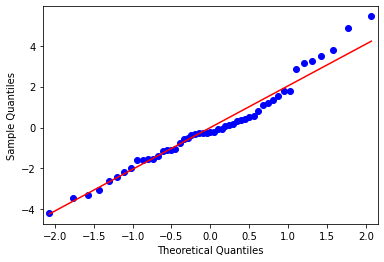

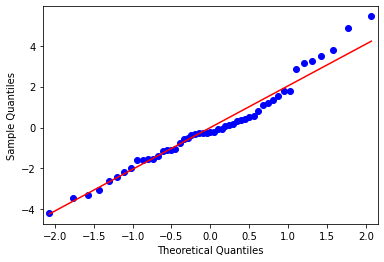

In [91]:
sm.qqplot(residuals, line='s')